In [4]:
import pandas as pd
from higashi import get_scc2
num = 200
nt = 0.1
i = 4
data_node = pd.read_csv('D:\\dataset\\insulation\\insulation_' + str(num) + '_40000_node' + str(i) + str(num) + '--is480001--nt' + str(nt) + '--ids320001--ss80001--immean.insulation.boundaries.bed', skiprows=1,sep='\t',header=None)
data_raw = pd.read_csv('D:\\dataset\\insulation\\insulation_' + str(num) + '_40000_raw' + str(i) + str(num) + '--is480001--nt' + str(nt) + '--ids320001--ss80001--immean.insulation.boundaries.bed', skiprows=1,sep='\t',header=None)
#data_all = pd.read_csv('D:\\dataset\\insulation\\insulation_' + str(num) + '_40000_all' + str(i) + str(num) + '--is480001--nt' + str(nt) + '--ids320001--ss80001--immean.insulation.boundaries.bed', skiprows=1,sep='\t',header=None)
data_all = pd.read_csv('D:\\dataset\\insulation\\insulation_1000_40000_all--is480001--nt0--ids320001--ss80001--immean.insulation.boundaries.bed', skiprows=1,sep='\t',header=None)

def compare(v, l, n):
    for i in range(n):
        if ((v + i * 40000) in l) or ((v - i * 40000) in l):return True
    return False

import numpy as np
data_n = np.array(data_node[1])
data_r = np.array(data_raw[1])
data_a = np.array(data_all[1])
n = 0
r = 0
for item in data_a:
    #print(item)
    a = 2
    if compare(item, data_r, a):
        r += 1
        #print('put r :', item)
    if compare(item, data_n, a):
        n += 1
        #print('put n :', item)
        #if n >= r : print('position:', item)

def F1_score(d1, d2):
    m = 0
    a = 2
    for item in d2:
        if compare(item, d1, a):
            m += 1
    F1 = 2 * (((m/len(d1)) * (m/len(d2))) / ((m/len(d1)) + (m/len(d2))))
    return F1
f_node = F1_score(data_n, data_a)
f_raw = F1_score(data_r, data_a)

n, r, f_node, f_raw, len(data_n), len(data_r), len(data_a)

(28, 58, 0.3163841807909605, 0.5201793721973095, 52, 98, 125)

In [202]:

def compare(v, l, n):
    for i in range(n):
        if ((v + i * 40000) in l) or ((v - i * 40000) in l):return True
    return False

import numpy as np
data_n = np.array(data_node[1])
data_r = np.array(data_raw[1])
data_a = np.array(data_all[1])
n = 0
r = 0
for item in data_a:
    #print(item)
    a = 2
    if compare(item, data_r, a):
        r += 1
        #print('put r :', item)
    if compare(item, data_n, a):
        n += 1
        #print('put n :', item)
        #if n >= r : print('position:', item)

def F1_score(d1, d2):
    m = 0
    a = 2
    for item in d2:
        if compare(item, d1, a):
            m += 1
    F1 = 2 * (((m/len(d1)) * (m/len(d2))) / ((m/len(d1)) + (m/len(d2))))
    return F1
f_node = F1_score(data_n, data_a)
f_raw = F1_score(data_r, data_a)

n, r, f_node, f_raw, len(data_n), len(data_r), len(data_a)

(25, 37, 0.25252525252525254, 0.3378995433789954, 73, 94, 125)

In [157]:
mat1 = np.loadtxt('D:\\py_project\\HiC_node2vec\\data\\norm_out.matrix')
mat2 = np.loadtxt('D:\\py_project\\HiC_node2vec\\data\\norm_raw.matrix')
mat_a = np.loadtxt('norm_raw_all_chr4_40000.matrix')
a1, b1 = get_scc2(mat1, mat_a, 155630120//40000)
a2, b2 = get_scc2(mat2, mat_a, 155630120//40000)
a1, a2

KeyboardInterrupt: 

In [51]:
mat1 = np.loadtxt('D:\\py_project\\HiC_node2vec\\data\\node_chr4_40000.matrix')
mat2 = np.loadtxt('D:\\py_project\\HiC_node2vec\\data\\raw_chr4_40000.matrix')
mat_a = np.loadtxt('raw_all_chr4_40000.matrix')
from higashi import zscore_norm
mat1 = zscore_norm(mat1)
mat2 = zscore_norm(mat2)
mat_a = zscore_norm(mat_a)
a1, b1 = get_scc2(mat1, mat_a, 155630120//40000)
a2, b2 = get_scc2(mat2, mat_a, 155630120//40000)
a1, a2

(0.8077065146496929, 0.7953708788841884)

In [ ]:
0.7117097462387301, 0.8260135896930645
(0.877449828503391, 0.9367076639199994)
(0.8077065146496929, 0.7953708788841884)

In [226]:
import os
import scipy
from tqdm import tqdm
from scipy.stats import zscore
from higashi import get_scc2
def Result_record(file_dir, chr_key, file, re=100000):
    HiC_node2vec_dir = file_dir + '\\HiC_node2vec'
    chr_dir = HiC_node2vec_dir + '\\' + file + '\\' + chr_key + '\\' + file + '_' + chr_key + '_' + str(re) + '_new' + '.matrix.gz'
    if os.path.isfile(chr_dir):
        return True
    return False
def get_file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if Result_record('D:\\dataset', 'chr4', file, 40000):
                L.append(file)
    return L
def randomfile(file_dir, r):
    scSCRIPE_dir = file_dir + '/filtered_1000_cells_single_cell_files'
    files = get_file_name(scSCRIPE_dir)
    np.random.shuffle(files)
    if r >= len(files): r = len(files)
    return files[:r]
file_dir = 'D:\\dataset'
files = randomfile(file_dir, 200)
def get_rawandout(file, file_dir, chr_key, re, type, ifnew=False):
    #100kb
    if not ifnew:
        o_dir = file_dir + '/' + file + '/' + chr_key + '/' + file + '_' + chr_key + '_' + str(re) + type
        r_dir = file_dir + '/' + file + '/' + chr_key + '/' + 'raw_' + chr_key + '_' + str(re) + type
    else:
        o_dir = file_dir + '/' + file + '/' + chr_key + '/' + file + '_' + chr_key + '_' + str(re) + '_new' + type
        r_dir = file_dir + '/' + file + '/' + chr_key + '/' + 'raw_' + chr_key + '_' + str(re) + '_new' + type

    #print(o_dir)
    if type == '.matrix.gz':
        raw = np.loadtxt(r_dir)
        node = np.loadtxt(o_dir)
        return raw, node
    elif type == '.npz':
        raw = scipy.sparse.load_npz(r_dir)
        node = scipy.sparse.load_npz(o_dir)
        return raw, node
    return #print('error : get none mat')
def get_mat(chr, num, re, type, ifnew = False):
    '''

    :param chr:
    :param num:
    :param re:
    :param type:.npz'
    :param output_dir:
    :return:
    '''
    file_dir = 'D:\\dataset'
    files = randomfile(file_dir, num)
    #print(files)
    HiC_dir = file_dir + '/HiC_node2vec'
    chr_key = chr
    raw, node = get_rawandout(files[0], HiC_dir, chr_key, re, type, ifnew)
    for file in tqdm(files[1:]):
        r, n = get_rawandout(file, HiC_dir, chr_key, re, type)
        if node.shape == n.shape:
            raw = raw + r
            node = node + n
    if type == '.npz':
        raw = raw.todense()
        node = node.todense()

    return raw, node

def zscore_norm(matrix):
    v = matrix.reshape((-1))
    if not (v == v[0]).all():
        matrix = zscore(v).reshape((len(matrix), -1))
    return matrix

all = np.loadtxt('raw_all_chr4_40000.matrix.gz')
all = zscore_norm(all)
raw, node = get_mat('chr4', 200, 40000, '.npz', False)
raw2, node2 = get_mat('chr4', 200, 40000, '.npz', True)
raw = zscore_norm(raw)
node = zscore_norm(node)
raw2 = zscore_norm(raw2)
node2 = zscore_norm(node2)
a1, b1 = get_scc2(node, all, 155630120//40000)
a2, b2 = get_scc2(raw, all, 155630120//40000)
a3, b3 = get_scc2(node2, all, 155630120//40000)
a4, b4 = get_scc2(raw2, all, 155630120//40000)
a1, a2, a3, a4


100%|██████████| 199/199 [00:20<00:00,  9.51it/s]


(0.8086081200703952,
 0.7896434330921023,
 0.8112313611449706,
 0.7799470888301328)

In [ ]:
(0.7923779248683094,
 0.7520832070771891,
 0.8033309041351508,
 0.7737578136323314)

8
0.6153846153846154
9


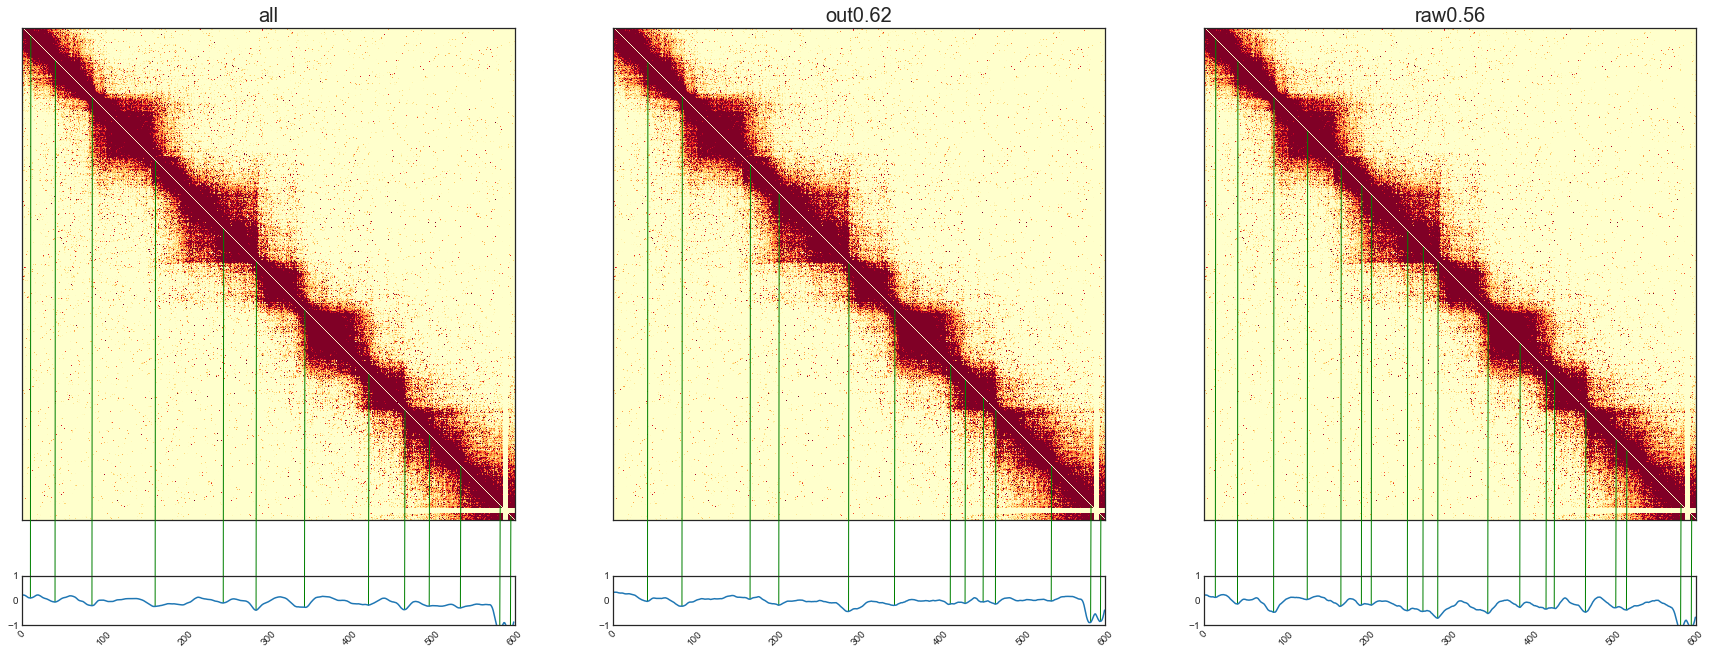

In [45]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from matplotlib.patches import ConnectionPatch
from matplotlib import colors
mpl.style.use('seaborn-white')

def compare(v, l, n):
    for i in range(n):
        if ((v + i) in l) or ((v - i) in l):return True
    return False

def F1_score(d1, d2):
    m = 0
    a = 5
    for item in d2:
        if compare(item, d1, a):
            m += 1

    print(m)
    F1 = 2 * (((m/len(d1)) * (m/len(d2))) / ((m/len(d1)) + (m/len(d2))))
    return F1
def fig_chr_heatmap(raw_out_matrix, out_matrix, out_matrix3, TAD_score, TAD, TAD3, b, b2, b3):
    plt.figure(figsize=(30, 11))
    widths = [10, 10, 10]
    heights = [10, 1]
    gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=widths,height_ratios=heights)
    #data = np.tril(out_matrix, k=0) + np.triu(raw_out_matrix, k=0)
    ax1 = plt.subplot(gs[0, 0])
    ax1.matshow(raw_out_matrix, cmap='YlOrRd', vmin=0.05, vmax=0.14)
    ax1.set_title('all', fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax2 = plt.subplot(gs[1, 0])
    x = range(len(TAD_score))
    plt.plot(x, TAD_score)
    plt.xticks(rotation=45)
    plt.xlim((0, 600))
    plt.ylim((-1, 1))
    color = colors.to_rgba('green')

    for item in b:
        if TAD_score[item] < -1 :TAD_score[item] = -1
        con = ConnectionPatch(xyA=(item,item), xyB=(item,TAD_score[item]), coordsA="data", coordsB="data",axesA=ax1, axesB=ax2)
        con.set_edgecolor(color)
        ax2.add_artist(con)
    '''term = b[0]
    for item in b[1:]:
        con = ConnectionPatch(xyA=(item,item), xyB=(item,-1), coordsA="data", coordsB="data",axesA=ax1, axesB=ax2)
        con.set_edgecolor(color)
        ax2.add_artist(con)'''
    ax3 = plt.subplot(gs[0, 1])
    ax3.matshow(out_matrix, cmap='YlOrRd', vmin=0.05, vmax=0.14)
    score = F1_score(b2, b)
    print(score)
    title = 'out' + str('%.2f' %score)
    ax3.set_title(title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax3.set_xticklabels([])
    ax3.set_yticklabels([])
    ax4 = plt.subplot(gs[1, 1])
    x = range(len(TAD))
    plt.plot(x, TAD)
    plt.xticks(rotation=45)
    plt.xlim((0, 600))
    plt.ylim((-1, 1))
    color = colors.to_rgba('green')
    for item in b2:
        if TAD[item] < -1 :TAD[item] = -1

        con = ConnectionPatch(xyA=(item,item), xyB=(item,TAD[item]), coordsA="data", coordsB="data",axesA=ax3, axesB=ax4)
        con.set_edgecolor(color)
        ax4.add_artist(con)
    ax5 = plt.subplot(gs[0, 2])
    ax5.matshow(out_matrix3, cmap='YlOrRd', vmin=0.05, vmax=0.14)
    score = F1_score(b3, b)
    title = 'raw' + str('%.2f' %score)

    ax5.set_title(title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax5.set_xticklabels([])
    ax5.set_yticklabels([])
    ax6 = plt.subplot(gs[1, 2])
    x = range(len(TAD3))
    plt.plot(x, TAD3)
    plt.xticks(rotation=45)
    plt.xlim((0, 600))
    plt.ylim((-1, 1))
    color = colors.to_rgba('green')
    for item in b3:
        if TAD3[item] < -1 :TAD3[item] = -1
        con = ConnectionPatch(xyA=(item,item), xyB=(item,TAD3[item]), coordsA="data", coordsB="data",axesA=ax5, axesB=ax6)
        con.set_edgecolor(color)
        ax6.add_artist(con)
    plt.show()
def get_alignment(data, data_b, start, stop):
    a = data[3]
    a = np.array(a)
    a = a[start:stop]
    b = np.array(data_b[1])
    c = []
    for i in range(len(b)):
        b[i] = b[i] / 40000
        if b[i] in range(start, stop):
            c.append(b[i]-start)
    return a, c
start = 200
stop = 800
data_node = pd.read_csv('D:\\dataset\\insulation\\insulation_100_40000_node0100--is480001--nt0.1--ids320001--ss80001--immean.insulation.bedGraph', skiprows=1,sep='\t', header=None)
data_n = pd.read_csv('D:\\dataset\\insulation\\insulation_100_40000_node0100--is480001--nt0.1--ids320001--ss80001--immean.insulation.boundaries.bed', skiprows=1,sep='\t',header=None)
data_raw = pd.read_csv('D:\\dataset\\insulation\\insulation_100_40000_raw0100--is480001--nt0.1--ids320001--ss80001--immean.insulation.bedGraph', skiprows=1,sep='\t', header=None)
data_r = pd.read_csv('D:\\dataset\\insulation\\insulation_100_40000_raw0100--is480001--nt0.1--ids320001--ss80001--immean.insulation.boundaries.bed', skiprows=1,sep='\t',header=None)
a2, c2 = get_alignment(data_node, data_n, start, stop)
a3, c3 = get_alignment(data_raw, data_r, start, stop)
mat1 = np.loadtxt('norm_raw_all_chr4_40000.matrix')
data = pd.read_csv('D:\\dataset\\insulation\\insulation_50_40000_all150--is480001--nt0.1--ids320001--ss80001--immean.insulation.bedGraph', skiprows=1,sep='\t',header=None)
data_a = pd.read_csv('D:\\dataset\\insulation\\insulation_50_40000_all150--is480001--nt0.1--ids320001--ss80001--immean.insulation.boundaries.bed', skiprows=1,sep='\t',header=None)
a1, c1 = get_alignment(data, data_a, start, stop)
fig_chr_heatmap(mat1[start:stop, start:stop], mat1[start:stop, start:stop], mat1[start:stop, start:stop], a1, a2, a3, c1, c2, c3)



In [39]:
c3

[14,
 41,
 85,
 126,
 167,
 192,
 204,
 248,
 267,
 285,
 346,
 385,
 417,
 427,
 465,
 502,
 515,
 581,
 594]

In [55]:
mat_hic = pd.read_csv('D:\\py_project\\HiC_node2vec\\data\\dataall\\GSE35156_GSM862720_J1_mESC_HindIII_ori_HiC.nodup.hic.summary.txt.gz', chunksize=500)

In [62]:
import gzip
path = 'D:\\py_project\\HiC_node2vec\\data\\dataall\\GSE35156_GSM862720_J1_mESC_HindIII_ori_HiC.nodup.hic.summary.txt.gz'
f = gzip.open(path, 'r')
text = f.readline().decode('utf-8')
print(text)




HWI-ST216_0305:5:1104:16545:105833#AGTAAG	chr1	3000000	-	chr1	5404761	+

